In [2]:
from google.colab import files
files.upload()

Saving titanic.ipynb to titanic.ipynb


{'titanic.ipynb': b'{\n  "nbformat": 4,\n  "nbformat_minor": 0,\n  "metadata": {\n    "colab": {\n      "provenance": []\n    },\n    "kernelspec": {\n      "name": "python3",\n      "display_name": "Python 3"\n    },\n    "language_info": {\n      "name": "python"\n    }\n  },\n  "cells": [\n    {\n      "cell_type": "code",\n      "source": [\n        "from google.colab import files\\n",\n        "files.upload()"\n      ],\n      "metadata": {\n        "colab": {\n          "base_uri": "https://localhost:8080/",\n          "height": 1000\n        },\n        "id": "RPBUWlprEbid",\n        "outputId": "b509372e-0fe1-40c3-ac3f-7008c29aa347"\n      },\n      "execution_count": 2,\n      "outputs": [\n        {\n          "output_type": "display_data",\n          "data": {\n            "text/plain": [\n              "<IPython.core.display.HTML object>"\n            ],\n            "text/html": [\n              "\\n",\n              "     <input type=\\"file\\" id=\\"files-be5020cb-e0a3-4

--- 1. Loading and Initial Inspection of Titanic Data ---
Success: Loaded Titanic dataset from Seaborn.

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

DataFrame information (Data Types and Missing Values):
<class 'pandas.core.frame.Dat

/tmp/ipython-input-3446353790.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['age'].fillna(df_eda['age'].median(), inplace=True)
/tmp/ipython-input-3446353790.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

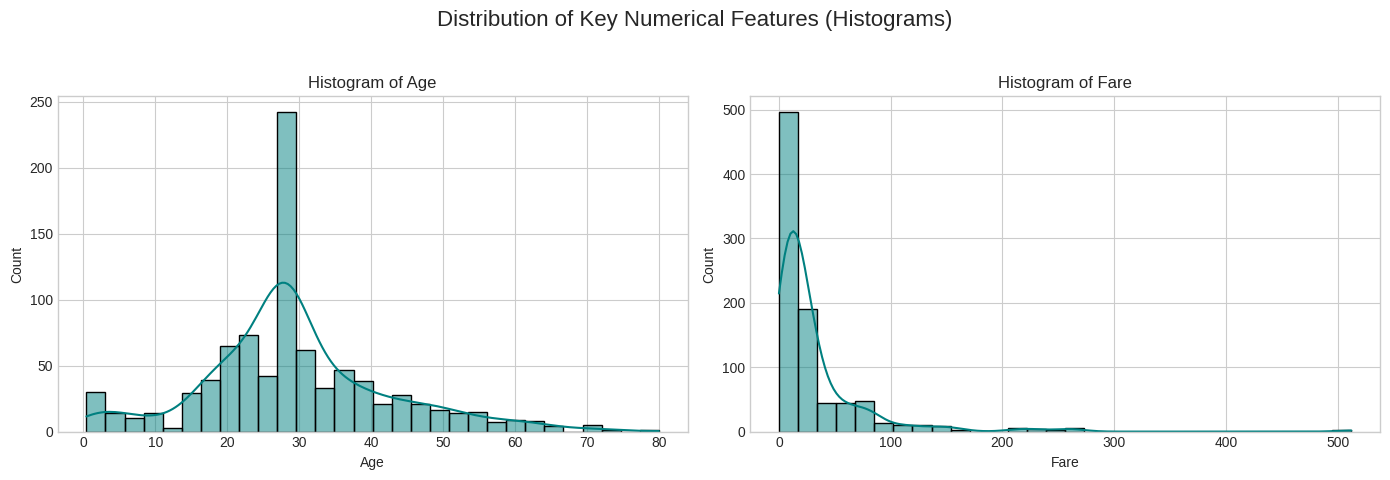

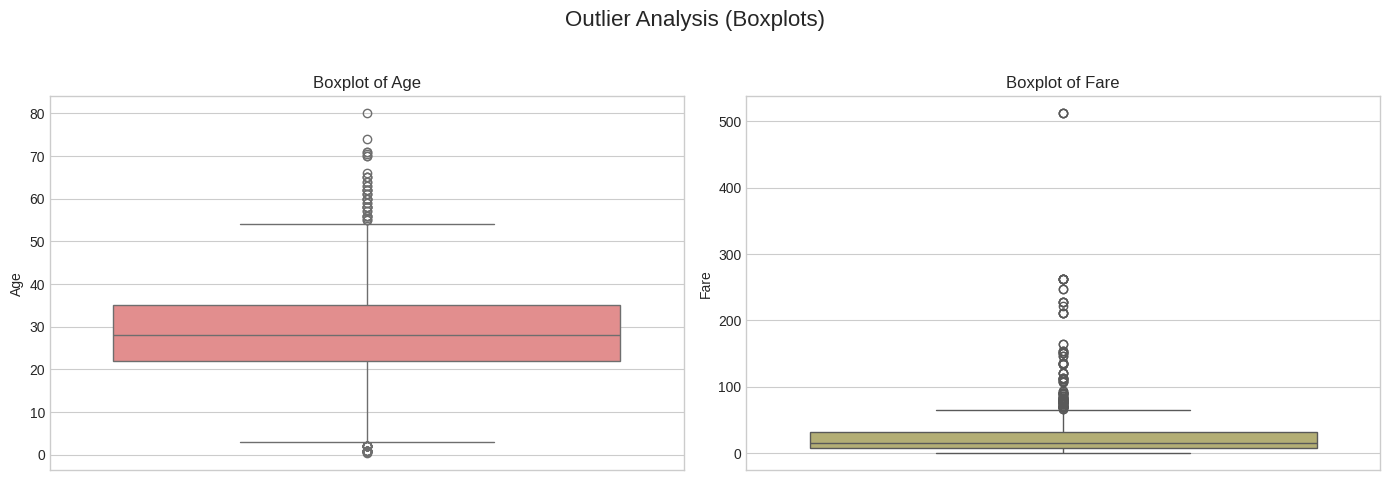

/tmp/ipython-input-3446353790.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df_eda, palette='coolwarm')


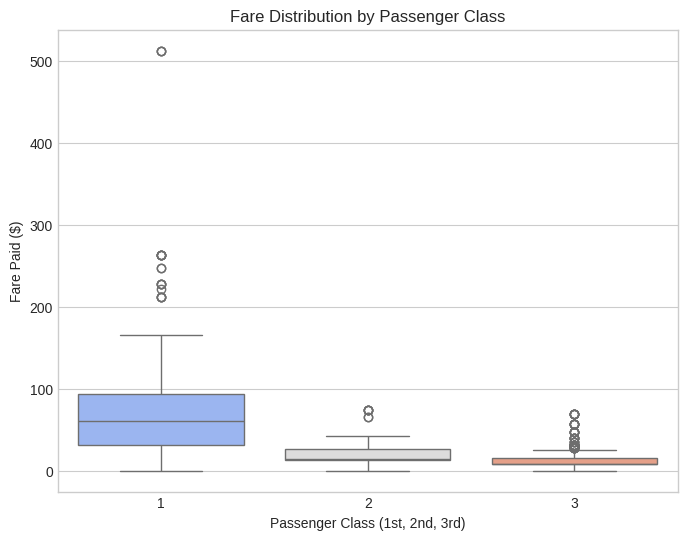

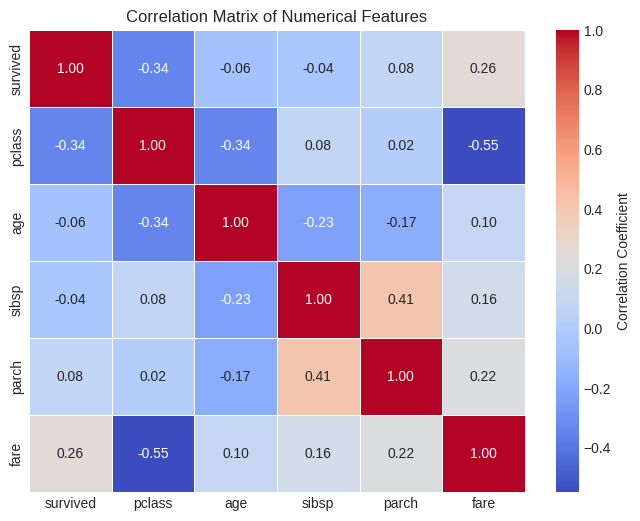


--- Generating Pairplot (Subset) ---


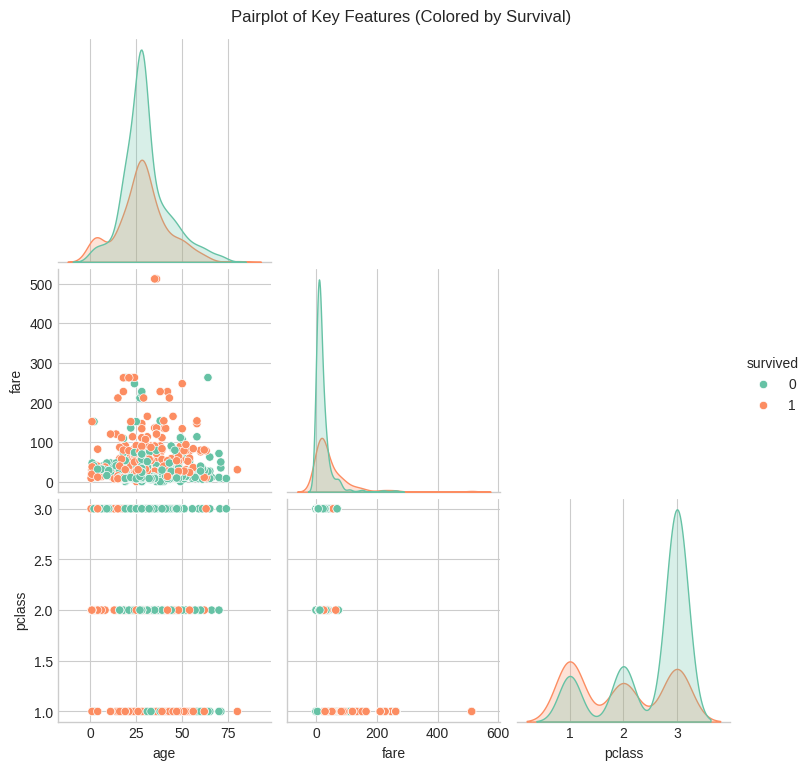


--- 6. Basic Feature-Level Inferences from EDA ---
1. Survival Rate: Approximately 38% of passengers survived (from value counts).
2. Age Distribution: The age histogram shows a concentration in the 20-40 range, with a sharp peak for children (0-5 years old).
3. Fare Distribution: The fare distribution is heavily right-skewed, indicating most passengers paid a very low fare, while a few paid extremely high fares (outliers are visible in the boxplot).
4. Pclass vs. Fare: The boxplot clearly shows that first-class (pclass=1) passengers paid significantly higher fares and have greater variance/outliers than 2nd and 3rd class.
5. Correlation (from Heatmap):
   - Survival has a moderate negative correlation with Pclass (-0.34). This suggests 1st class passengers were more likely to survive.
   - Survival has a moderate positive correlation with Fare (0.26). Higher fares correlate with better survival rates.
   - Pclass and Fare have a strong negative correlation (-0.55). Lower class (3rd) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# --- 1. Load Data ---
print("--- 1. Loading and Initial Inspection of Titanic Data ---")
try:
    # Attempt to load the built-in Titanic dataset from Seaborn (preferred)
    df = sns.load_dataset('titanic')
    print("Success: Loaded Titanic dataset from Seaborn.")
except ValueError:
    # Fallback to a mock DataFrame if the Seaborn load fails.
    # IMPORTANT: This mock includes 'sibsp' and 'parch' to prevent KeyError.
    print("Warning: Could not load data using seaborn. Using a simplified mock DataFrame.")
    data = {
        'survived': [0, 1, 1, 0, 0],
        'pclass': [3, 1, 3, 1, 3],
        'sex': ['male', 'female', 'female', 'male', 'male'],
        'age': [22.0, 38.0, 26.0, 35.0, 35.0],
        'sibsp': [1, 1, 0, 1, 0], # Siblings/Spouses Aboard
        'parch': [0, 0, 0, 0, 0], # Parents/Children Aboard
        'fare': [7.25, 71.28, 7.92, 53.10, 8.05],
        'embarked': ['S', 'C', 'S', 'S', 'Q'],
        'deck': [np.nan, 'C', np.nan, 'C', np.nan]
    }
    df = pd.DataFrame(data)

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataFrame information (Data Types and Missing Values):")
df.info()


# --- 2. Generate Summary Statistics ---
print("\n--- 2. Summary Statistics for Numerical Features ---")
# Generates count, mean, std, min, max, and quartiles for numerical columns
print(df.describe())

print("\nSummary Statistics for Categorical Features (Value Counts):")
for col in ['survived', 'pclass', 'sex', 'embarked']:
    # Check if column exists before printing value counts (important for mock data)
    if col in df.columns:
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts())


# --- 3. Preprocessing for Visualizations ---
# Simple handling of missing values for visualization stability
df_eda = df.copy()
# Fill Age NaNs with the median age
df_eda['age'].fillna(df_eda['age'].median(), inplace=True)
# Fill Fare NaNs with the median fare
df_eda['fare'].fillna(df_eda['fare'].median(), inplace=True)


# --- 4. Create Histograms and Boxplots for Numeric Features ---
# 4a. Histograms for distribution analysis
numerical_features = ['age', 'fare']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Key Numerical Features (Histograms)', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.histplot(df_eda[col], kde=True, ax=axes[i], bins=30, color='teal')
    axes[i].set_title(f'Histogram of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4b. Boxplots for outlier detection and comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Outlier Analysis (Boxplots)', fontsize=16)

# Age boxplot
sns.boxplot(y=df_eda['age'], ax=axes[0], color='lightcoral')
axes[0].set_title('Boxplot of Age')
axes[0].set_ylabel('Age')

# Fare boxplot
sns.boxplot(y=df_eda['fare'], ax=axes[1], color='darkkhaki')
axes[1].set_title('Boxplot of Fare')
axes[1].set_ylabel('Fare')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4c. Feature relationship: Fare distribution across Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df_eda, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Fare Paid ($)')
plt.show()


# --- 5. Pairplot and Correlation Matrix for Feature Relationships ---

# 5a. Correlation Heatmap (using numerical features)
# This step is now safe as 'sibsp' and 'parch' are guaranteed to exist in both real and mock data.
numerical_df = df_eda[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5b. Pairplot (only on a small subset to keep runtime/output manageable)
print("\n--- Generating Pairplot (Subset) ---")
# Pairplot is computationally expensive, so we use a small, relevant subset
subset_features = ['survived', 'age', 'fare', 'pclass']
sns.pairplot(df_eda[subset_features], hue='survived', palette='Set2', corner=True)
plt.suptitle('Pairplot of Key Features (Colored by Survival)', y=1.02)
plt.show()


# --- 6. Inferences and Conclusion ---
print("\n--- 6. Basic Feature-Level Inferences from EDA ---")
print("1. Survival Rate: Approximately 38% of passengers survived (from value counts).")
print("2. Age Distribution: The age histogram shows a concentration in the 20-40 range, with a sharp peak for children (0-5 years old).")
print("3. Fare Distribution: The fare distribution is heavily right-skewed, indicating most passengers paid a very low fare, while a few paid extremely high fares (outliers are visible in the boxplot).")
print("4. Pclass vs. Fare: The boxplot clearly shows that first-class (pclass=1) passengers paid significantly higher fares and have greater variance/outliers than 2nd and 3rd class.")
print("5. Correlation (from Heatmap):")
print("   - Survival has a moderate negative correlation with Pclass (-0.34). This suggests 1st class passengers were more likely to survive.")
print("   - Survival has a moderate positive correlation with Fare (0.26). Higher fares correlate with better survival rates.")
print("   - Pclass and Fare have a strong negative correlation (-0.55). Lower class (3rd) means lower fare.")
print("6. Sex vs. Survival (Not explicitly plotted, but often key): Female passengers had a much higher survival rate than male passengers (seen in `sex` vs `survived` relationships if analyzed further).")

print("\nEDA Complete. Statistical summaries and visualizations have been generated.")